In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
train_df = pd.read_csv('train_combined_load_temp.csv', header=0)
test_df = pd.read_csv('test_combined_load_temp.csv', header=0)

In [18]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [19]:
train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  
0            2      2  2017  
1            2      2  2017  
2            2      2  2017  
3            2      2  2017  
4            2      2  2017

In [20]:
train_df.dtypes

date                        datetime64[ns]
HourlyDryBulbTemperature           float64
mw                                 float64
hour_of_day                          int64
day_of_week                          int64
month                                int64
year                                 int64
dtype: object

### plot of all data

In [26]:
plt.plot(train_df['date'], train_df['mw'], markevery=336, figure=figure(figsize=(15, 10)))
plt.show()

### plot of load for 1 week of data

/tmp/ipykernel_115/2133996464.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_week_df = train_df[train_df['date'] > "2017-02-05"][train_df['date'] < "2017-02-13"]


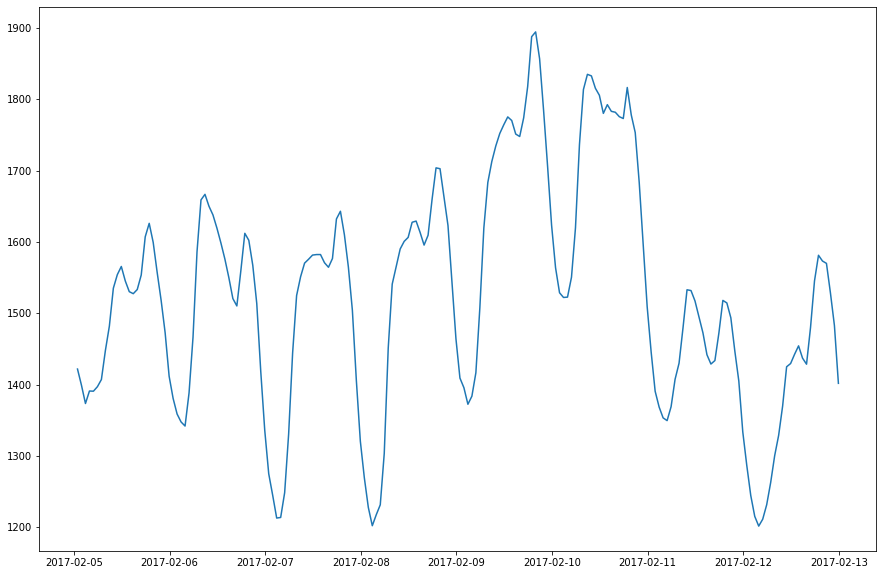

In [33]:
train_week_df = train_df[train_df['date'] > "2017-02-05"][train_df['date'] < "2017-02-13"]
plt.plot(train_week_df['date'], train_week_df['mw'], figure=figure(figsize=(15, 10)))
plt.show()

### plot of 1 day of data

In [42]:
train_day_df = train_df[train_df['date'].between(left="2017-02-07", right="2017-02-08")]

In [43]:
train_day_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
144 2017-02-07 00:53:00                      44.0  1275.229            0   
145 2017-02-07 01:53:00                      44.0  1244.810            1   
146 2017-02-07 02:53:00                      47.0  1213.038            2   
147 2017-02-07 03:53:00                      49.0  1213.876            3   
148 2017-02-07 04:53:00                      50.0  1248.641            4   

     day_of_week  month  year  
144            1      2  2017  
145            1      2  2017  
146            1      2  2017  
147            1      2  2017  
148            1      2  2017

In [44]:
plt.plot(train_day_df['date'], train_day_df['mw'], figure=figure(figsize=(15, 10)))
plt.show()

### choose 3 days of a given week and plot the hourly mw for each on same graph

In [63]:
train_day1_df = train_df[train_df['date'].between(left="2017-02-07", right="2017-02-08")]
train_day2_df = train_df[train_df['date'].between(left="2017-02-08", right="2017-02-09")]
train_day3_df = train_df[train_df['date'].between(left="2017-02-12", right="2017-02-13")]

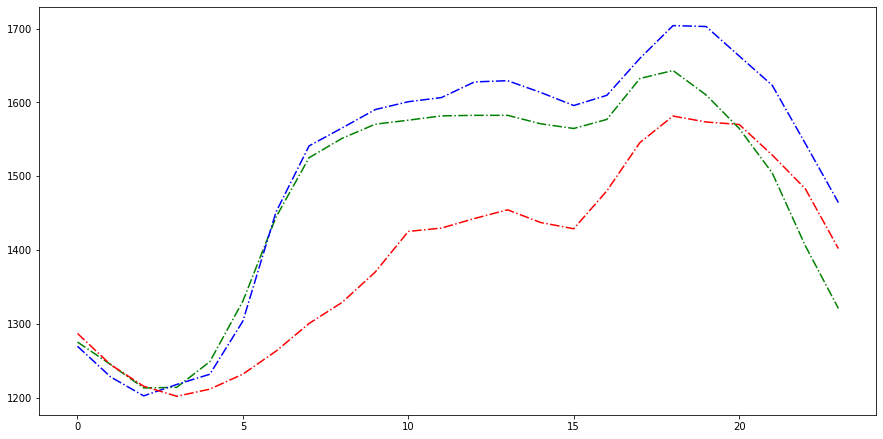

In [69]:
fig, ax = plt.subplots()
ax.plot(train_day1_df['hour_of_day'], train_day1_df['mw'], 'g-.', label='Tue')
ax.plot(train_day2_df['hour_of_day'], train_day2_df['mw'], 'b-.', label='Wed')
ax.plot(train_day3_df['hour_of_day'], train_day3_df['mw'], 'r-.', label='Sun')
fig.set_size_inches((15, 7.5))

Above plot shows that around 18:00 hours there is a peak in energy consumption and it falls to the lowest level around 03:00 daily

### plot temperature data with hourly mw for 1 week

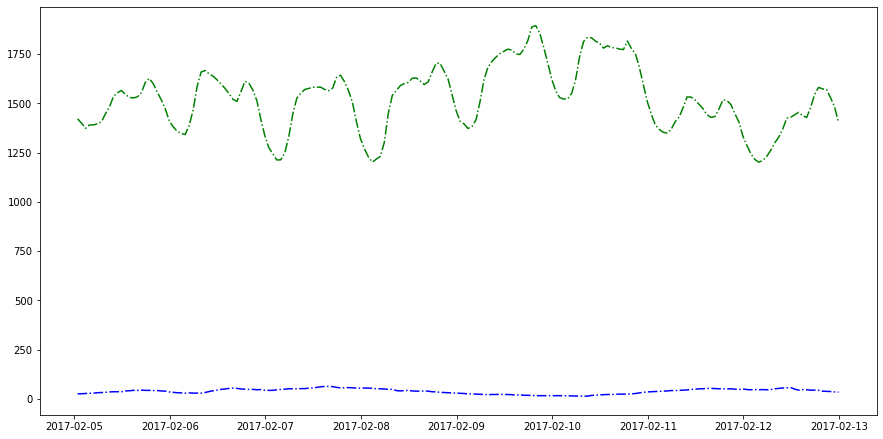

In [68]:
fig2, ax2 = plt.subplots()
ax2.plot(train_week_df['date'], train_week_df['mw'], 'g-.', label='mw')
ax2.plot(train_week_df['date'], train_week_df['HourlyDryBulbTemperature'], 'b-.', label='HourlyDryBulbTemperature')
fig2.set_size_inches((15, 7.5))

### plot of mw with temperature
Overlay of the plots from the energy and temperature data using a dual-axis line graph with different scales.

Reference: https://stackoverflow.com/a/45925049/2070734

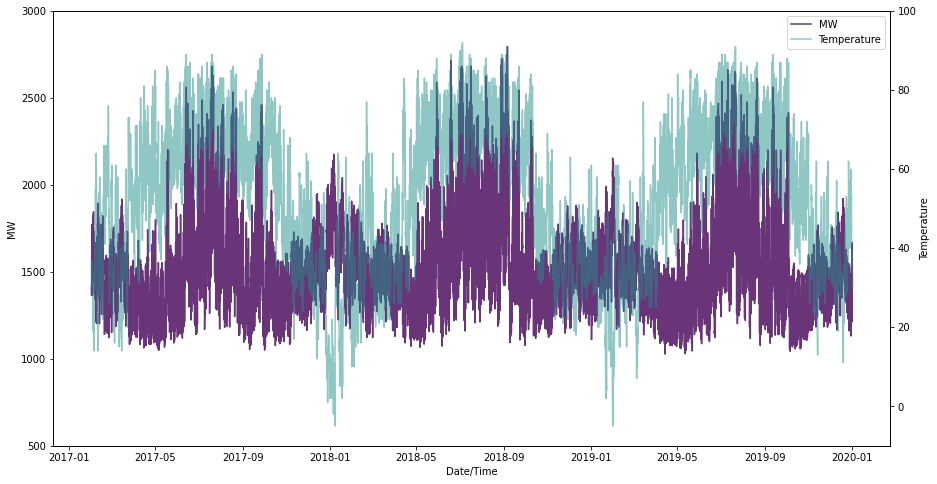

In [96]:
fig3, host = plt.subplots(figsize=(15,8))
par1 = host.twinx()

host.set_ylim(500, 3000)
par1.set_ylim(-10, 100)

host.set_xlabel("Date/Time")
host.set_ylabel("MW")
par1.set_ylabel("Temperature")

color1 = plt.cm.viridis(1)
color2 = plt.cm.viridis(0.5)

p1, = host.plot(train_df['date'], train_df['mw'], color=color1, label="MW", alpha=0.8)
p2, = par1.plot(train_df['date'], train_df['HourlyDryBulbTemperature'], color=color2, label="Temperature", alpha=0.5)

lns = [p1, p2]
host.legend(handles=lns, loc='best')

### Plot of 1 week of temp data with load overlaid for Jan

/tmp/ipykernel_115/1243312856.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_jan_week_df = train_df[train_df['date'] > "2017-02-08"][train_df['date'] < "2017-02-16"]


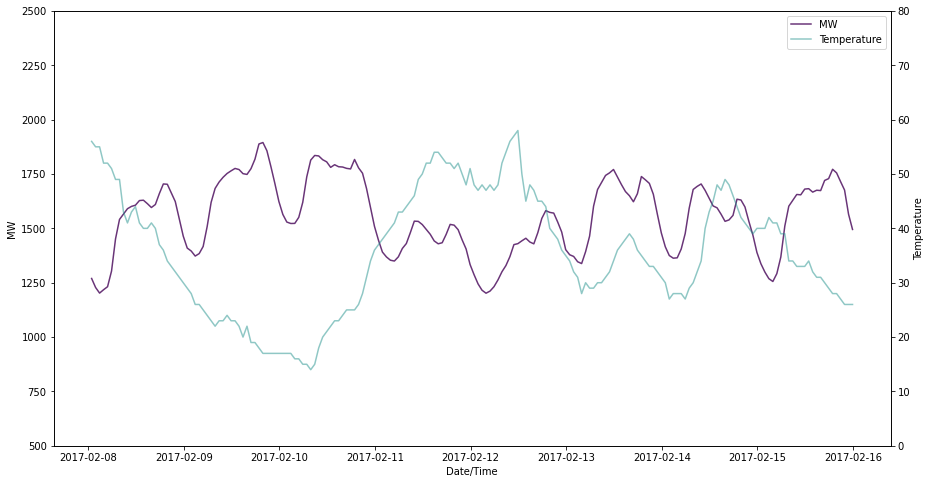

In [102]:
train_jan_week_df = train_df[train_df['date'] > "2017-02-08"][train_df['date'] < "2017-02-16"]

fig4, host4 = plt.subplots(figsize=(15,8))
par41 = host4.twinx()

host4.set_ylim(500, 2500)
par41.set_ylim(0, 80)

host4.set_xlabel("Date/Time")
host4.set_ylabel("MW")
par41.set_ylabel("Temperature")

p41, = host4.plot(train_jan_week_df['date'], train_jan_week_df['mw'], color=color1, label="MW", alpha=0.8)
p42, = par41.plot(train_jan_week_df['date'], train_jan_week_df['HourlyDryBulbTemperature'], color=color2, label="Temperature", alpha=0.5)

lns4 = [p41, p42]
host4.legend(handles=lns4, loc='best')

### Plot of 1 week of temp data with load overlaid for Jul

/tmp/ipykernel_115/1120818648.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_jul_week_df = train_df[train_df['date'] > "2017-07-09"][train_df['date'] < "2017-07-17"]


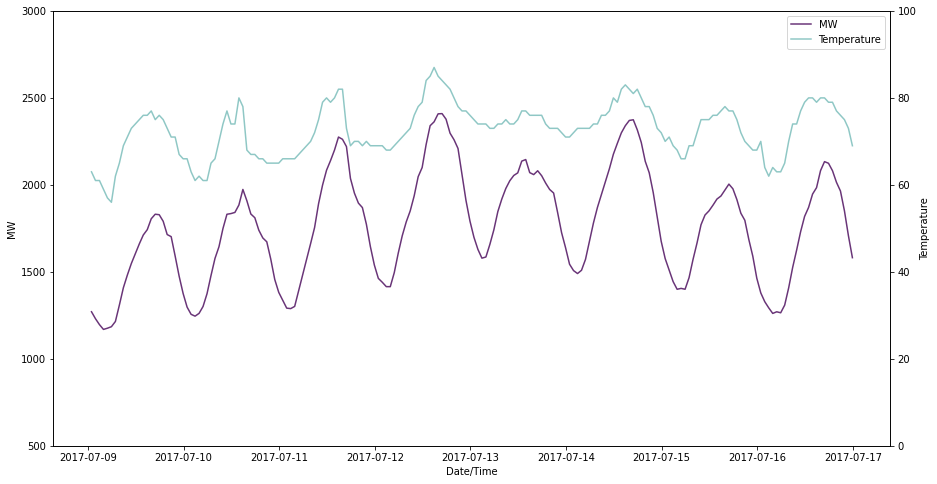

In [104]:
train_jul_week_df = train_df[train_df['date'] > "2017-07-09"][train_df['date'] < "2017-07-17"]

fig4, host4 = plt.subplots(figsize=(15,8))
par41 = host4.twinx()

host4.set_ylim(500, 3000)
par41.set_ylim(0, 100)

host4.set_xlabel("Date/Time")
host4.set_ylabel("MW")
par41.set_ylabel("Temperature")

p41, = host4.plot(train_jul_week_df['date'], train_jul_week_df['mw'], color=color1, label="MW", alpha=0.8)
p42, = par41.plot(train_jul_week_df['date'], train_jul_week_df['HourlyDryBulbTemperature'], color=color2, label="Temperature", alpha=0.5)

lns4 = [p41, p42]
host4.legend(handles=lns4, loc='best')

In January lower temperatures are correlated with higher load in general. In July higher temperature is correlated with higher loads.
It looks like extremes in temperature are correlated to higher loads. 


### correlation coefficient between load and temp

In [109]:
train_df['HourlyDryBulbTemperature'].corr(train_df['mw'])

0.32753955690741204

### scatter plot between temperatur (x) and load (y)

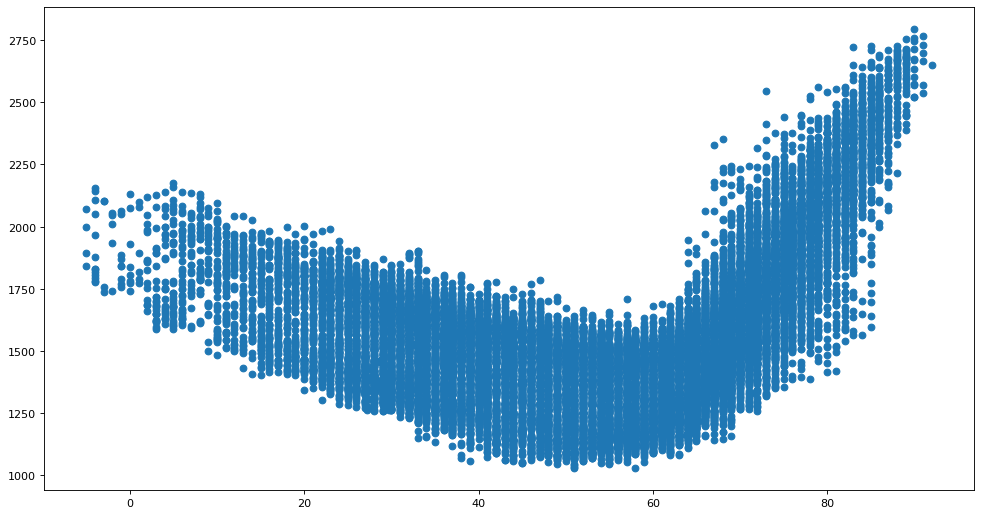

In [113]:
plt.figure(figsize=(15, 8), dpi=80)
plt.scatter(train_df['HourlyDryBulbTemperature'], train_df['mw'])